In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [9]:
import time
from sklearn.metrics import mean_absolute_error
import seaborn as sns

## Load dataset

In [4]:
path_out = r'E:\Other Projects\Nano particles - Dr. Harinda\nanoproject-visuolization-sliit\Model_training\output'
file_path_features = os.path.join(path_out , 'features_selected_35_original.npy')
file_path_labels = os.path.join(path_out , 'labels_selected_1_original.npy')
file_path_features_stand = os.path.join(path_out , 'features_selected_35_standardized.npy')
with open( file_path_features , 'rb') as f:
    features = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_stand , 'rb') as f:
    features_stand = np.load(f)
print(features.shape)
print(labels.shape)
print(features_stand.shape)

(3999, 35)
(3999, 1)
(3999, 35)


## Visualize data

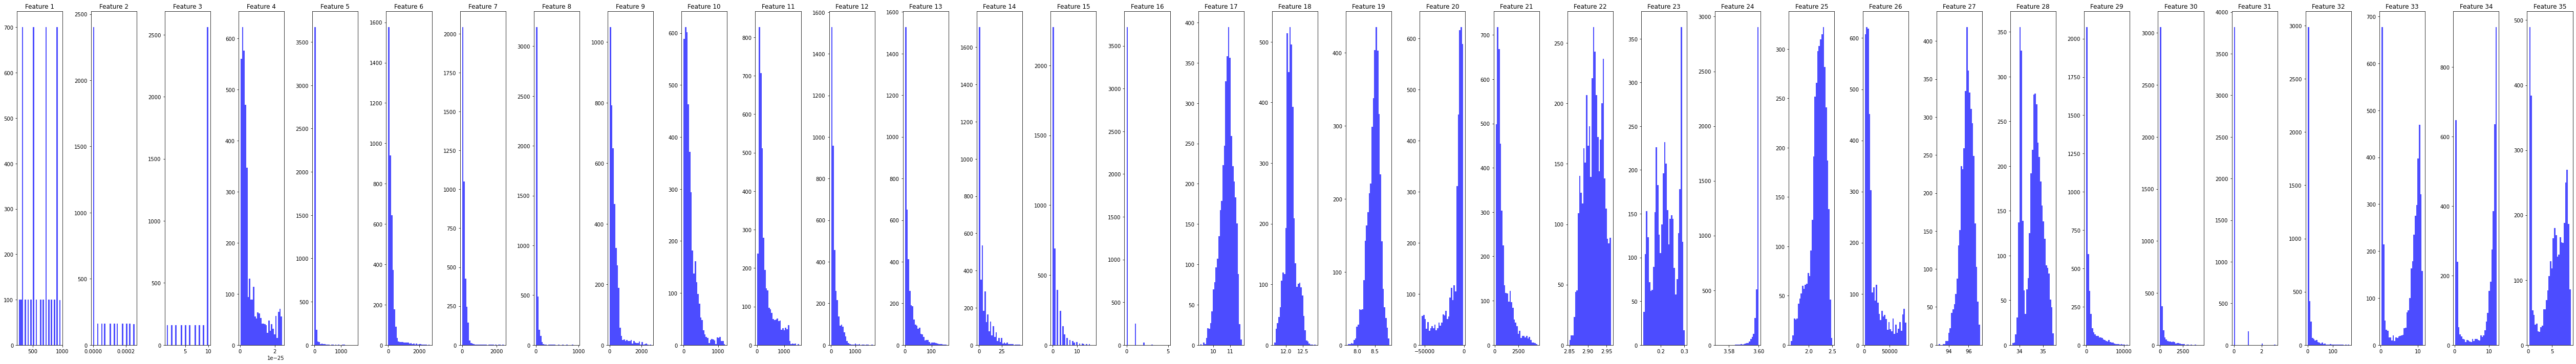

In [5]:
data = features
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


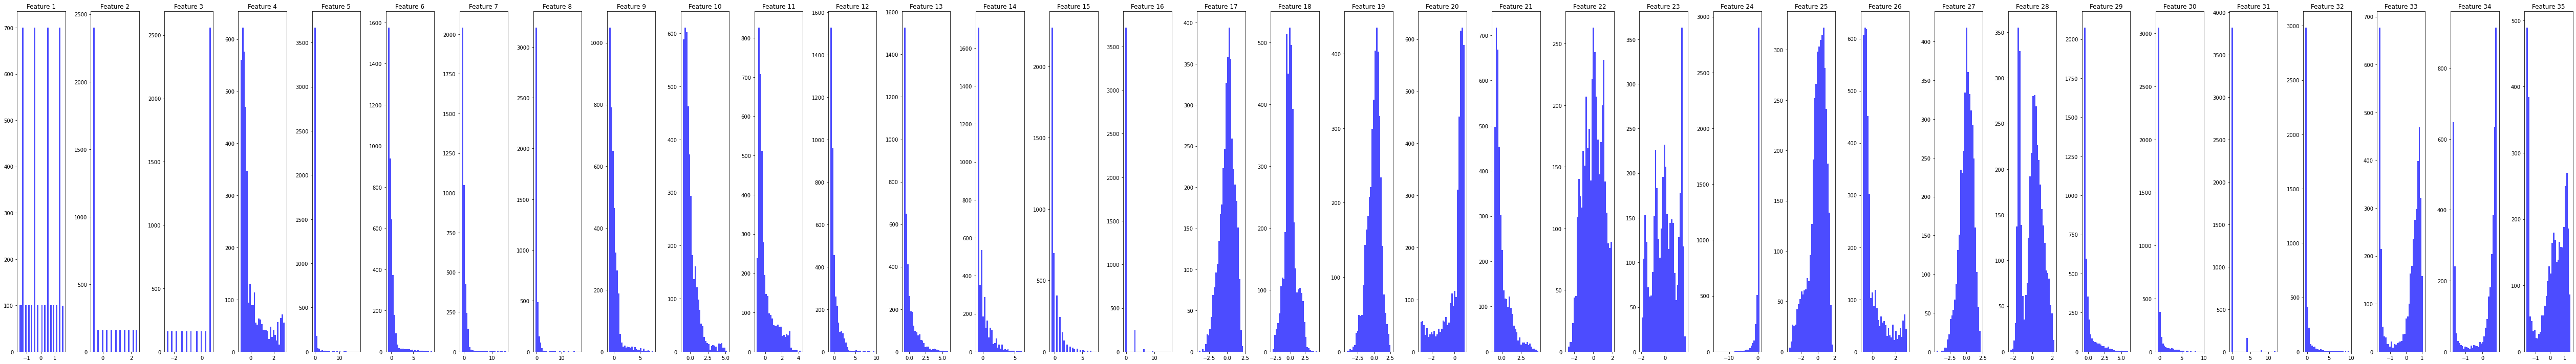

In [6]:
data = features_stand
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

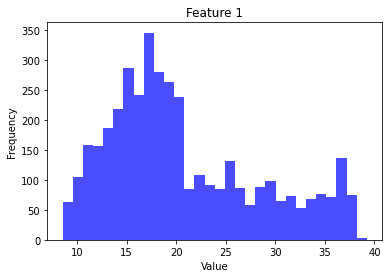

In [7]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [8]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.51, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (392, 35)
features test shape: (408, 35)
labels validation shape: (392, 1)
labes test shape: (408, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


## Model Training

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

params_grid = {
    'n_estimators': [64, 128, 256, 512, 1024, 2048, 4096, 8192],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}


# params_grid = {
#     'n_estimators': [100, 300],
#     'max_depth': [None]
# }

rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator=rf, param_grid=params_grid, cv=2, verbose=2, n_jobs=-1)


training_start = time.time()
rf_grid.fit(X_train, y_train)
training_end = time.time()

print("Best parameters found: ", rf_grid.best_params_)
print("Best grid search score: ", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_
print('E', rf_best)

testing_start = time.time()
y_pred = rf_best.predict(X_test)
testing_end = time.time()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)
print("R^2 value: ", r2)

print("Time taken for training: {:.2f} seconds".format(training_end - training_start))
print("Time taken for testing: {:.2f} seconds".format(testing_end - testing_start))


Fitting 2 folds for each of 96 candidates, totalling 192 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best grid search score:  0.9985929110813959
E RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=300)
Mean Squared Error:  0.0734667636137645
R^2 value:  0.9986680082866741
Time taken for training: 235.69 seconds
Time taken for testing: 0.15 seconds


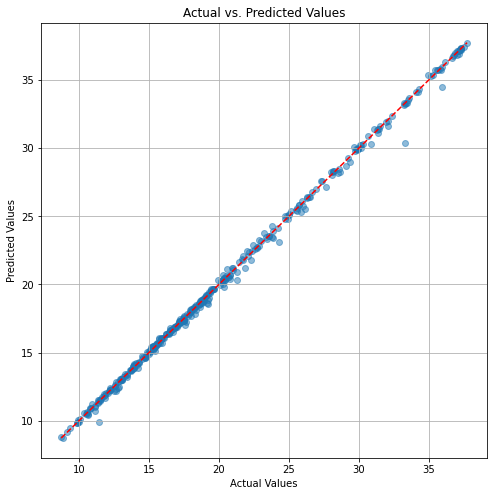

In [12]:
predicted_values = y_pred
actual_values = y_test
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

min_val = min(np.min(actual_values), np.min(predicted_values))
max_val = max(np.max(actual_values), np.max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.grid(True)
plt.show()

In [17]:
predicted_values.shape
actual_values.shape

(392, 1)

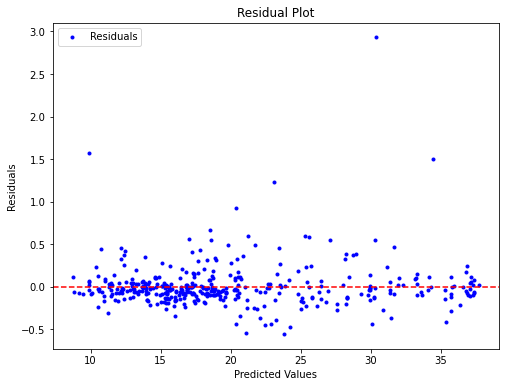

In [18]:
residuals = actual_values.squeeze()  - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', marker='.', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

## Suppor Vector Machine (for regression) 

In [16]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best grid search score: ", grid_search.best_score_)

best_svr = grid_search.best_estimator_
print('F', best_svr)

y_pred = best_svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)
print("R^2 value: ", r2)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


OSError: [Errno 22] Invalid argument

In [ ]:
predicted_values = y_pred
actual_values = y_test
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

min_val = min(np.min(actual_values), np.min(predicted_values))
max_val = max(np.max(actual_values), np.max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.grid(True)
plt.show()

In [ ]:
residuals = actual_values - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', marker='.', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()